# Profit Prediction of various startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Datasets\50_Startups.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.drop(['State'],axis=1,inplace=True)

In [ ]:
df.info()

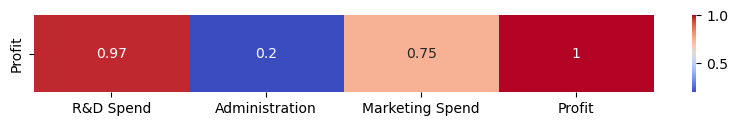

In [63]:
df.corr()
plt.figure(figsize=(10,1))
sns.heatmap(df.corr().loc[['Profit'],:],annot= True, cmap='coolwarm')
plt.show()

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Muliple Linear Regression Model
- y(profit)=b0 + b1 * X1(R&D Spend) + b2 * X2(Administration) + b3 * X3(Marketing_Spend)

In [64]:
# Set the variables
X=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

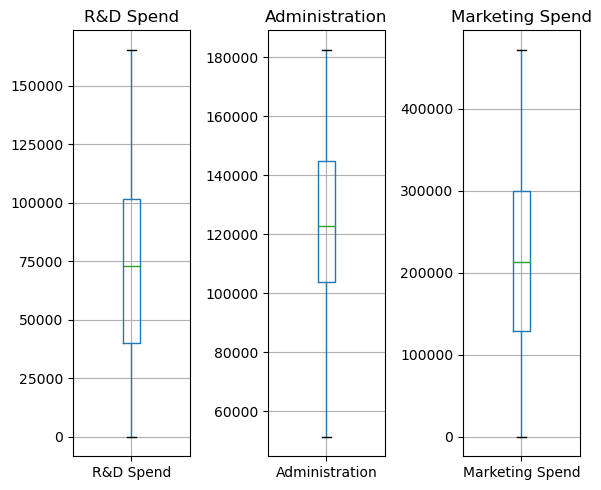

In [21]:
#check for the outliers
fig,ax=plt.subplots(1,3,figsize=(6,5))
df.boxplot('R&D Spend', ax=ax[0])
ax[0].set_title('R&D Spend')
df.boxplot('Administration', ax=ax[1])
ax[1].set_title('Administration')
df.boxplot('Marketing Spend', ax=ax[2])
ax[2].set_title('Marketing Spend')
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


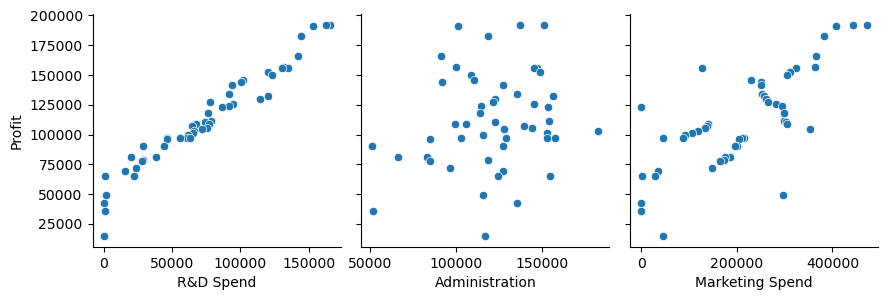

In [23]:
sns.pairplot(df, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit', height=3, aspect=1, kind='scatter')
plt.show()

In [65]:
#split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_train.shape


(35,)

In [66]:
#perform linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 3)
(15, 3)
(35,)
(15,)


In [68]:
lr.intercept_

54454.56631940789

In [69]:
lr.coef_

array([ 0.76266689, -0.02987867,  0.02066138])

In [70]:
list(zip(X,lr.coef_))

[('R&D Spend', 0.762666889877613),
 ('Administration', -0.02987867435330965),
 ('Marketing Spend', 0.02066137505120091)]

In [71]:
y_pred=lr.predict(X_test)
x_pred=lr.predict(X_train)

In [72]:
y_pred.shape

(15,)

In [73]:
print("prediction for test set : {}".format(y_pred))

prediction for test set : [ 50408.18947806 127399.20280402  51892.58298947 115777.21204124
 156172.12816784 100163.39215219 133651.22102015 186218.30987457
 183111.04077667 125786.10810112  84998.19654615 159547.5949239
  76674.75254853 168934.29674549  98341.43810796]


In [74]:
#Actual value and predicted value
lr_diff=pd.DataFrame({'Actual value': y_test,"predicted value":y_pred})
lr_diff

,Actual value,predicted value
47,42559.73,50408.189478
12,141585.52,127399.202804
49,14681.40,51892.582989
19,122776.86,115777.212041
7,155752.60,156172.128168
30,99937.59,100163.392152
11,144259.40,133651.221020
0,192261.83,186218.309875
1,191792.06,183111.040777
13,134307.35,125786.108101


# Plotting and Visualization

Text(0, 0.5, 'Profit')

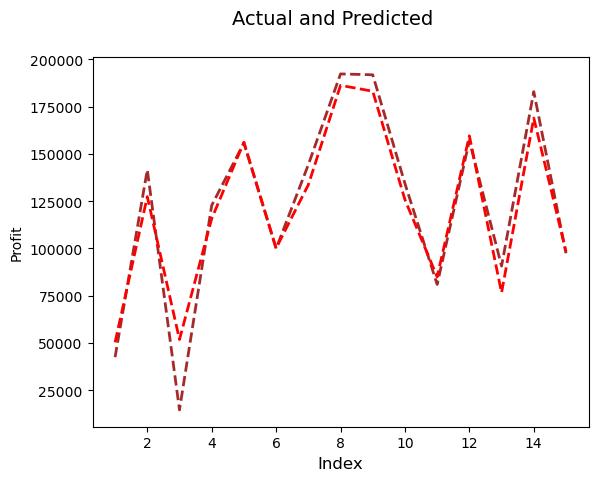

In [75]:
c=[i for i in range(1,16,1)] # for generaing index numbers
fig=plt.figure()
plt.plot(c,y_test,color='brown',linewidth=2,linestyle="--")
plt.plot(c,y_pred,color='red',linewidth=2,linestyle='--')
fig.suptitle("Actual and Predicted",fontsize=14)
plt.xlabel('Index',fontsize=12)
plt.ylabel('Profit')

Text(0, 0.5, 'ytest-ypred')

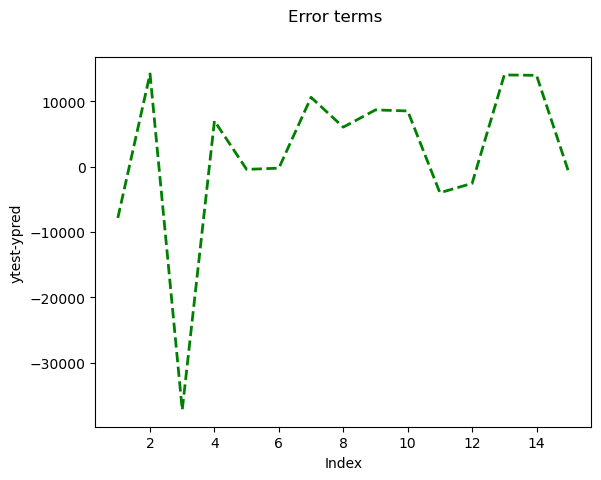

In [76]:
#Error terms
c=[i for i in range(1,16,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='green',linewidth=2,linestyle='--')
fig.suptitle('Error terms',fontsize=12)
plt.xlabel('Index',fontsize=10)
plt.ylabel('ytest-ypred',fontsize=10)

# Model Evaluation

In [77]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(r2)

160601217.22184116
9076.854563585257
0.9373678127211815


### Since the R ^2 score is 0.93 implies that 93 percent of the profit prediction can be explained by the independent variables such as R & D,administration and ependiture.